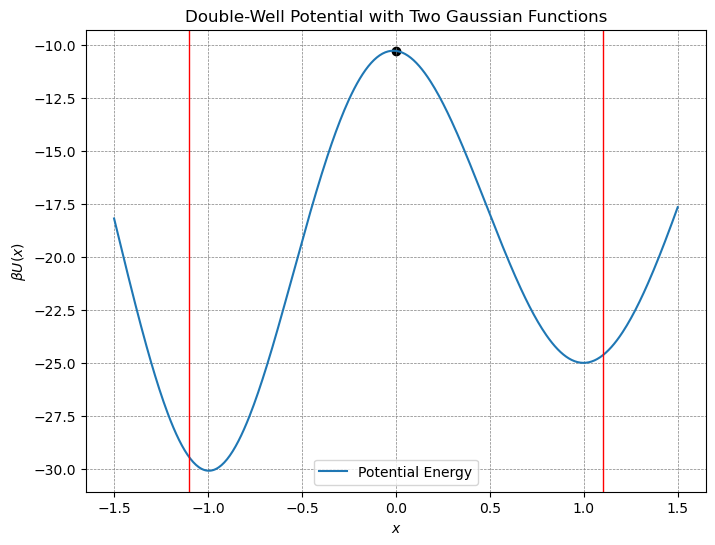

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.integrate import quad
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline

# Define the double-well potential using two Gaussian functions
# def double_gaussian_potential(x, A1=3, mu1=-1, sigma1=0.5, A2=4, mu2=1, sigma2=0.6):
def double_gaussian_potential(x, A1=30, mu1=-1, sigma1=0.5, A2=25, mu2=1, sigma2=0.6):
    V1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    V2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return -(V1 + V2)
beta_U = double_gaussian_potential

D0 = 0.01
def D(x):
    # return D0*x**(2/3)
    return D0*x**0
x = np.linspace(-1.5, 1.5, 400)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(x, beta_U(x), label='Potential Energy')
plt.title('Double-Well Potential with Two Gaussian Functions')
plt.xlabel('$x$')
plt.ylabel(r'$\beta U(x)$')
# plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(1.1, color='red',linewidth=1)
plt.axvline(-1.1, color='red',linewidth=1)
plt.scatter(0.0, beta_U(0.0), color='black')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [2]:
a = 0.1    # location of reflecting boundary (will be used twice)
b1 = -1.1  # location of lower absorbing boundary
b2 = 1.1  # location of upper absorbing boundary
h = 0.01
N1 = round((a-b1)/h+1)
N2 = round((b2-a)/h+1)
x1_arr = np.linspace(b1, a, N1)
x2_arr = np.linspace(a, b2, N2)

In [3]:
from transfer_matrix_reptile import TransferMatrix_InReAb, TransferMatrix_AbReIn

ari1_trans = TransferMatrix_AbReIn(h, x1_arr, beta_U, 0)
ira2_trans = TransferMatrix_InReAb(h, x2_arr, beta_U, 0)

from mfpt_Pst_RW_simulate import simulate_AbRe, simulate_ReAb

num_particles = 2000
init_position = a
hx = h
ht = hx**2/(2*D0)
n1_arr = np.arange(b1, a+h/2, h)
n1_arr = np.round(n1_arr, decimals=5)
count_n1, ti_n1 = simulate_AbRe(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n1_arr, a=a, b=b1, hx=hx)

n2_arr = np.arange(a, b2+h/2, h)
n2_arr = np.round(n2_arr, decimals=5)
count_n2, ti_n2 = simulate_ReAb(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n2_arr, a=a, b=b2, hx=hx)

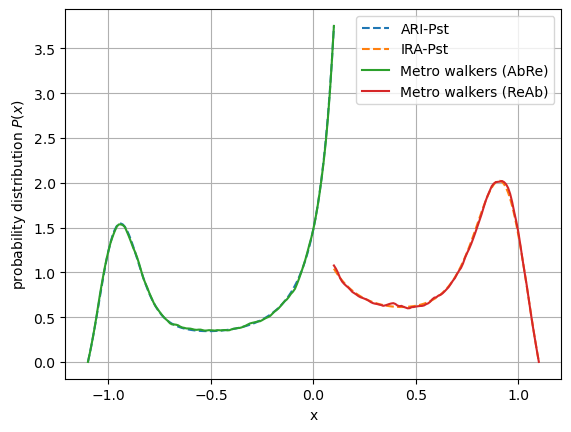

In [4]:
ari1_trans.steady_state[0] = 0
ira2_trans.steady_state[-1] = 0
ari1_trans.steady_state = ari1_trans.steady_state/(h*np.sum(ari1_trans.steady_state))
ira2_trans.steady_state = ira2_trans.steady_state/(h*np.sum(ira2_trans.steady_state))
plt.plot(x1_arr, ari1_trans.steady_state, '--', label="ARI-Pst")
plt.plot(x2_arr, ira2_trans.steady_state, '--', label="IRA-Pst")

count_n1[0] = 0 
count_n2[-1] = 0 
Pst_n1 = count_n1/(h*np.sum(count_n1))
Pst_n2 = count_n2/(h*np.sum(count_n2))
plt.plot(n1_arr, Pst_n1, label="Metro walkers (AbRe)")
plt.plot(n2_arr, Pst_n2, label="Metro walkers (ReAb)")

plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()

In [5]:
Pst_n1- ari1_trans.steady_state

array([ 0.00000000e+00,  1.53430536e-03,  3.15547891e-03,  3.30471981e-03,
        6.87816195e-03,  1.70947276e-02,  2.42291371e-02,  2.13631713e-02,
        1.76466405e-02,  1.06630725e-02, -3.51225626e-04, -4.35424063e-03,
       -1.41514045e-02, -1.50270526e-02, -5.21545008e-03, -4.28517834e-03,
       -9.82392145e-03, -6.91667854e-03, -3.44413735e-03, -1.50848015e-02,
       -1.99895461e-02, -1.98444488e-02, -1.66900103e-02,  1.46417877e-03,
        1.28281161e-02,  1.40494862e-02,  4.99451939e-03, -4.51566435e-03,
        3.76947803e-03,  1.14545327e-02,  7.07438735e-03,  7.12092448e-03,
        1.01114788e-03,  7.32422603e-04,  4.92534124e-03,  5.65862792e-03,
        3.49770139e-03,  1.35191341e-03,  2.29114166e-04, -8.01704605e-04,
       -9.76220351e-03, -7.44145435e-03,  3.66702357e-03,  1.21381976e-02,
        1.48514056e-02,  8.70357043e-03,  5.96828061e-03,  7.95311820e-03,
        6.99846299e-03,  1.09473911e-02,  1.33275669e-02,  1.14103851e-02,
        8.39675194e-03,  

/tmp/ipykernel_10488/2435505431.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (AbRe)')
/tmp/ipykernel_10488/2435505431.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (ReAb)')
/tmp/ipykernel_10488/2435505431.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
/tmp/ipykernel_10488/2435505431.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")


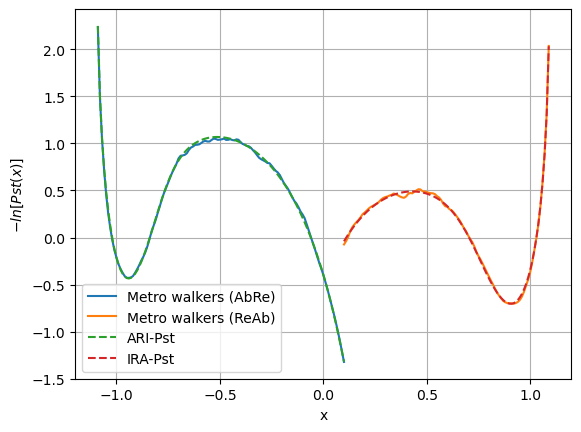

In [6]:
plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (AbRe)')
plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (ReAb)')
plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

[ 1.45008898e-02 -5.28856067e-03 -6.43643277e-02 -4.42653858e-02
 -3.20184672e-02 -1.81596414e-02 -4.49650901e-02 -1.31966766e-02
 -3.49602675e-03 -2.81746417e-03 -1.71781797e-02 -2.18608250e-02
 -6.13122810e-03 -1.08911962e-02 -1.29621257e-02 -1.08200752e-02
 -1.19635530e-02 -1.09779438e-02 -7.87573961e-03 -6.33941645e-03
 -8.08144054e-03 -1.09884951e-02 -1.34021030e-02 -9.54288706e-03
 -4.90576032e-03  2.79412018e-03  6.64726978e-03  1.04952721e-02
  6.47324247e-03  3.90193174e-03  4.95202838e-03  4.58820874e-03
 -2.57025310e-04 -3.35718780e-03 -2.44580159e-03 -1.28551993e-03
 -1.38735715e-03  1.04998740e-03 -1.76773882e-04  9.57511965e-04
  4.50190935e-03  2.25231540e-03  2.47433888e-03 -8.43856849e-04
 -3.07874142e-03 -1.39863075e-03 -2.62842156e-03 -5.70184327e-03
 -6.90372355e-03 -6.63226394e-03 -8.76882233e-03 -1.48701985e-02
 -1.66334198e-02 -2.04155220e-02 -1.91858230e-02 -1.86456824e-02
 -1.62707438e-02 -1.70481527e-02 -1.53187422e-02 -1.67966797e-02
 -1.57740645e-02 -1.74154

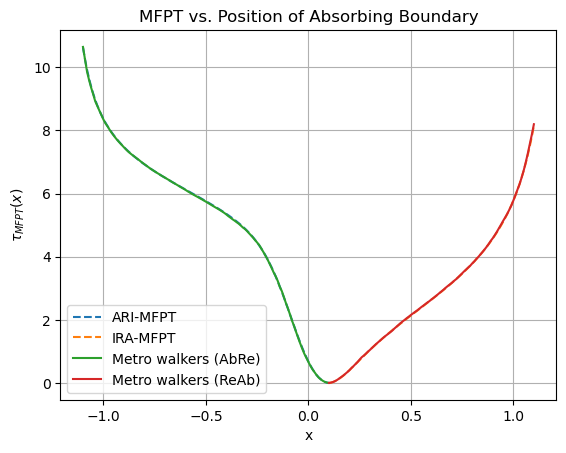

In [7]:
def mfpt_matrix(transMat_instance):
    ria_trans = transMat_instance
    ria_P = ria_trans.trans_mat.T
    idx_fixed_vect = np.where(np.round(ria_trans.eig6_w.real, decimals=10) == 1)[0][0]
    vec_pi = ria_trans.eig6_v[:,idx_fixed_vect].real/np.sum(ria_trans.eig6_v[:,idx_fixed_vect].real)
    N = vec_pi.size
    epsilon = np.ones(N)
    mat_I = np.eye(N)
    mat_E = np.ones((N, N))
    mat_Z = np.linalg.inv(mat_I-ria_P+np.outer(epsilon, vec_pi))
    vec_Zdg = np.diag(mat_Z)
    mat_Zdg = np.diag(vec_Zdg)
    mat_Mdg = np.diag(1/vec_pi)
    mat_M = (mat_I - mat_Z + mat_E @ mat_Zdg) @ mat_Mdg
    mat_Mbar = mat_M - mat_Mdg
    return mat_Mbar

m1_bar = mfpt_matrix(ari1_trans)
m2_bar = mfpt_matrix(ira2_trans)
delt_t = h**2/(2*D0)
plt.plot(x1_arr, delt_t*m1_bar[-1], '--', label="ARI-MFPT")
plt.plot(x2_arr, delt_t*m2_bar[0], '--', label="IRA-MFPT")

mfpt1_simu_arr = ht*np.mean(ti_n1, axis=0)
mfpt2_simu_arr = ht*np.mean(ti_n2, axis=0)
mfpt1_simu_arr[-1] = 0
mfpt2_simu_arr[0] = 0

plt.plot(n1_arr, mfpt1_simu_arr, label="Metro walkers (AbRe)")
plt.plot(n2_arr, mfpt2_simu_arr, label="Metro walkers (ReAb)")
plt.xlabel('x')
plt.ylabel(r"$\tau_{MFPT} (x)$")
plt.title('MFPT vs. Position of Absorbing Boundary')
plt.legend()
plt.grid()
print(mfpt1_simu_arr-delt_t*m1_bar[-1])

#### Steady-State Flux and Probability Distribution Function - Numerically Nest integrate the expression (referred to be exact) 

In [8]:
# Define the inner function to integrate as a function of y
def inner_integrand(y):
    return 1.0/D(y)*np.exp(beta_U(y))

# Define the inner integral as a function of x
def inner_integral(x):
    y_lower = b1
    y_upper = x
    result, error = quad(inner_integrand, y_lower, y_upper)
    return result

# Define the outer integral
x_lower = b1
x_upper = a

# Define the outer function to integrate (also as a function of x)
def outer_integrand(x):
    return -np.exp(-beta_U(x))*inner_integral(x)

# Perform the outer integration
invert_st1_flux, error = quad(outer_integrand, x_lower, x_upper)
st1_flux = 1.0/invert_st1_flux

# Define the inner function to integrate as a function of y
def inner_integrand(y):
    return 1.0/D(y)*np.exp(beta_U(y))

# Define the inner integral as a function of x
def inner_integral(x):
    y_lower = x
    y_upper = b2
    result, error = quad(inner_integrand, y_lower, y_upper)
    return result

# Define the outer integral
x_lower = a
x_upper = b2

# Define the outer function to integrate (also as a function of x)
def outer_integrand(x):
    return np.exp(-beta_U(x))*inner_integral(x)

invert_st2_flux, error = quad(outer_integrand, x_lower, x_upper)
st2_flux = 1.0/invert_st2_flux
print(st1_flux, st2_flux)

-0.10184511007373662 0.13024795665375374


In [9]:
def st1_P_func(x):
    def integrand(y):
        return 1.0/D(y)*np.exp(beta_U(y))
    # Perform the integration
    y_lower = b1
    y_upper = x
    result, error = quad(integrand, y_lower, y_upper)
    result *= -st1_flux*np.exp(-beta_U(x))
    return result

st1_P_arr = np.zeros(x1_arr.size)
for i in np.arange(x1_arr.size):
    st1_P_arr[i] = st1_P_func(x1_arr[i])

def st2_P_func(x):
    def integrand(y):
        return 1.0/D(y)*np.exp(beta_U(y))
    # Perform the integration
    y_lower = x
    y_upper = b2
    result, error = quad(integrand, y_lower, y_upper)
    result *= st2_flux*np.exp(-beta_U(x))
    return result

st2_P_arr = np.zeros(x2_arr.size)
for i in np.arange(x2_arr.size):
    st2_P_arr[i] = st2_P_func(x2_arr[i])

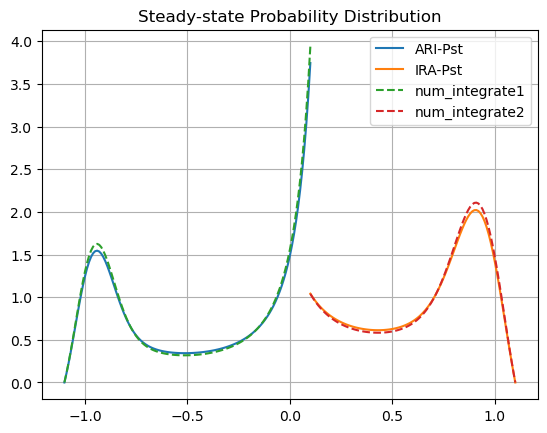

In [10]:
plt.plot(x1_arr, ari1_trans.steady_state, label="ARI-Pst")
plt.plot(x2_arr, ira2_trans.steady_state, label="IRA-Pst")
plt.plot(x1_arr, st1_P_arr, '--', label='num_integrate1')
plt.plot(x2_arr, st2_P_arr, '--', label='num_integrate2')
plt.title('Steady-state Probability Distribution')
plt.grid()
plt.legend()

/tmp/ipykernel_10488/2221330045.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(ari1_trans.steady_state), label="ARI-Pst")
/tmp/ipykernel_10488/2221330045.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(ira2_trans.steady_state), label="IRA-Pst")
/tmp/ipykernel_10488/2221330045.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(st1_P_arr), '--', label='num_integrate1')
/tmp/ipykernel_10488/2221330045.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(st2_P_arr), '--', label='num_integrate2')


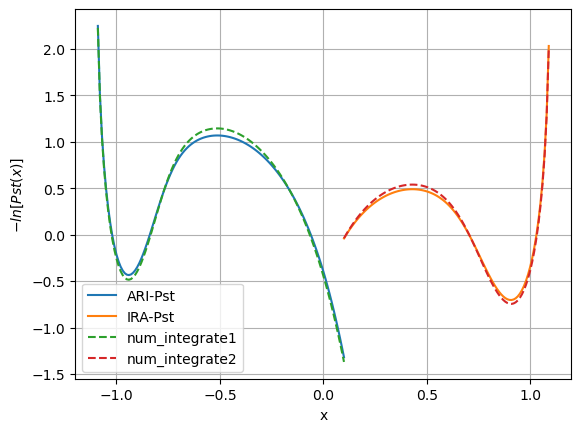

In [11]:
plt.plot(x1_arr, -np.log(ari1_trans.steady_state), label="ARI-Pst")
plt.plot(x2_arr, -np.log(ira2_trans.steady_state), label="IRA-Pst")
plt.plot(x1_arr, -np.log(st1_P_arr), '--', label='num_integrate1')
plt.plot(x2_arr, -np.log(st2_P_arr), '--', label='num_integrate2')
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

#### Numerically Nest integrate for MFPT - referred to be exact

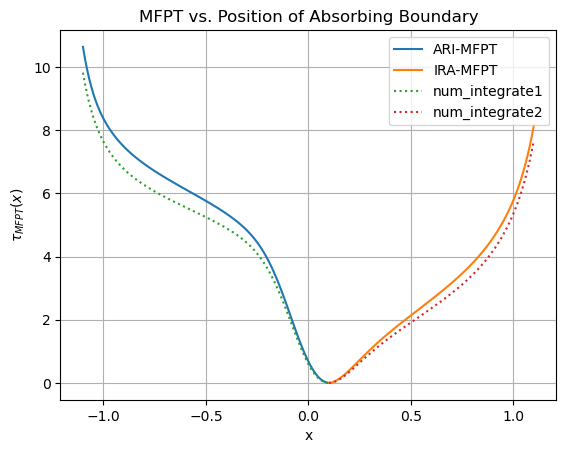

In [12]:
x0 = a   # Regura's method, overlap the starting point and reflecting boundary
# Define the inner function to integrate as a function of z
def inner_integrand(z):
    return np.exp(-beta_U(z))

# Define the inner integral as a function of y
def inner_integral(y):
    z_lower = a
    z_upper = y
    result, error = quad(inner_integrand, z_lower, z_upper)
    return result

# Define the outer integral2
y_lower = x0
y_upper = b2
# Define the outer function to integrate (also as a function of y)
def outer_integrand(y):
    return np.exp(beta_U(y))*inner_integral(y)/D(y)
mfpt2_arr = np.zeros(x2_arr.size)
for i in np.arange(x2_arr.size):
    mfpt2_arr[i], _ = quad(outer_integrand, y_lower, x2_arr[i])

# Define the outer integral1
y_lower = x0
y_upper = b1
# Define the outer function to integrate (also as a function of y)
def outer_integrand(y):
    return np.exp(beta_U(y))*inner_integral(y)/D(y)
mfpt1_arr = np.zeros(x1_arr.size)
for i in np.arange(x1_arr.size):
    mfpt1_arr[i], _ = quad(outer_integrand, y_lower, x1_arr[i])

plt.xlabel('x')
plt.ylabel(r"$\tau_{MFPT} (x)$")
plt.plot(x1_arr, delt_t*m1_bar[-1], label="ARI-MFPT")
plt.plot(x2_arr, delt_t*m2_bar[0], label="IRA-MFPT")
plt.plot(x1_arr, mfpt1_arr,':', label='num_integrate1')
plt.plot(x2_arr, mfpt2_arr, ':',  label='num_integrate2')
plt.title('MFPT vs. Position of Absorbing Boundary')
plt.legend()
plt.grid()

### Define Functions for Reconstructing Free Energy with MFPT and steady state distribution

In [13]:
def reconstruct_energy_ra(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[-1] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[1+i], x_arr[-1])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]-(mfpt_arr[-1]-mfpt_arr[1+i])/mfpt_arr[-1])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1], x_arr[1+i])
        beta_Grec2_arr[i] = beta_U(x_arr[1])+np.log(Bx_arr[i]/Bx_arr[0])-integral_invertBx_arr[i]
    return beta_Grec2_arr

def reconstruct_energy_ar(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[0] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]+(mfpt_arr[1+i]-mfpt_arr[0])/mfpt_arr[0])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1+i], x_arr[-2])
        beta_Grec2_arr[i] = beta_U(x_arr[-2])+np.log(Bx_arr[i]/Bx_arr[-1])-integral_invertBx_arr[i]
    return beta_Grec2_arr

#### Test Reconstruction Function with Exact Data

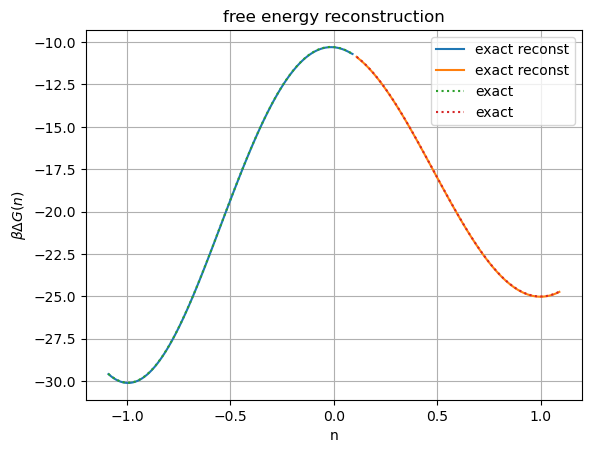

In [14]:
exact_beta_Grec2_arr1 = reconstruct_energy_ar(x1_arr, Pst_arr=st1_P_arr, mfpt_arr=mfpt1_arr)
exact_beta_Grec2_arr2 = reconstruct_energy_ra(x2_arr, Pst_arr=st2_P_arr, mfpt_arr=mfpt2_arr)

plt.plot(x1_arr[1:-1], exact_beta_Grec2_arr1, label="exact reconst")
plt.plot(x2_arr[1:-1], exact_beta_Grec2_arr2, label="exact reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()

### Reconstruction Using data [mfpt matrix (mat_Mbar[i]), Pst (ria_trans.steady_state)] calculated by Transfer Matrix

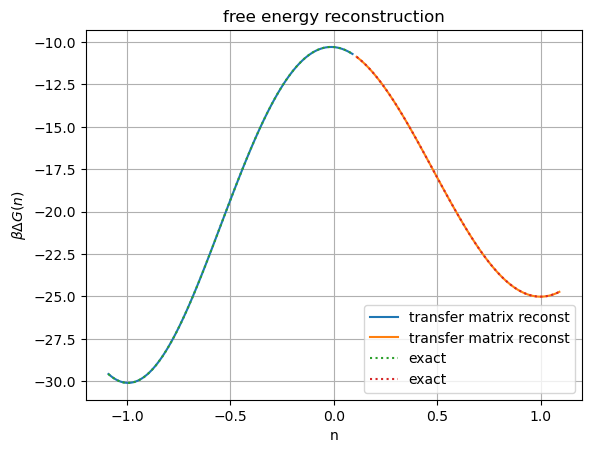

In [15]:
beta_Grec2_arr1 = reconstruct_energy_ar(x1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=m1_bar[-1])
beta_Grec2_arr2 = reconstruct_energy_ra(x2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=m2_bar[0])

plt.plot(x1_arr[1:-1], beta_Grec2_arr1, label="transfer matrix reconst")
plt.plot(x2_arr[1:-1], beta_Grec2_arr2, label="transfer matrix reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()

### Reconstruction Using data [mfpt (mfpt1_simu_arr), Pst (Pst_n)] extracted from simulation

/tmp/ipykernel_10488/2877723197.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
/tmp/ipykernel_10488/2877723197.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the su

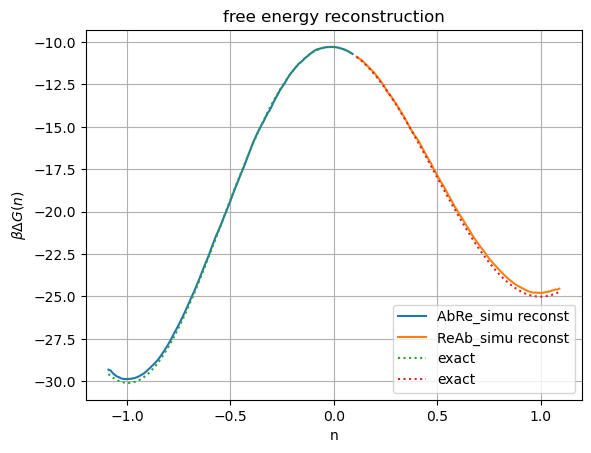

In [16]:
# np.append(delt_t*m1_bar[-1][0], mfpt1_simu_arr[1:])
beta_Grec2_arr11 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=mfpt1_simu_arr)
beta_Grec2_arr22 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=mfpt2_simu_arr)

plt.plot(n1_arr[1:-1], beta_Grec2_arr11, label="AbRe_simu reconst")
plt.plot(n2_arr[1:-1], beta_Grec2_arr22, label="ReAb_simu reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()

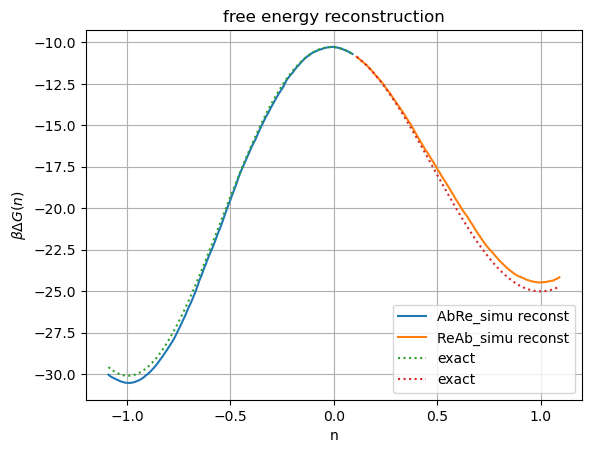

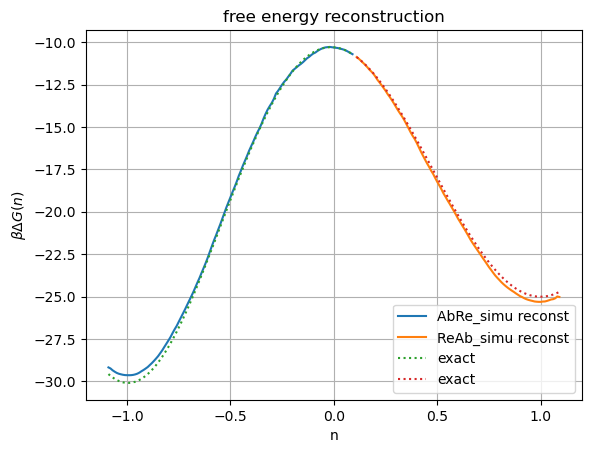

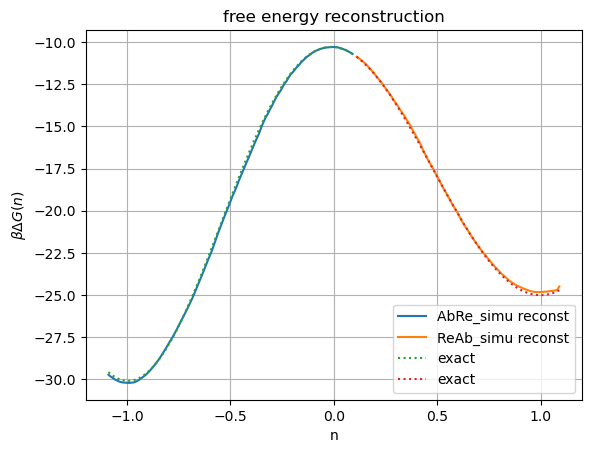

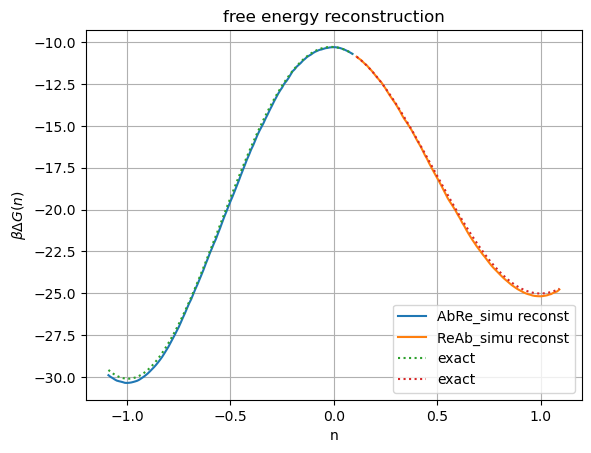